In [3]:
import sys
## sometimes works to install packages

# !conda install --yes --prefix {sys.prefix} pandas
# !conda install --yes --prefix {sys.prefix} numpy
# !conda install --yes --prefix {sys.prefix} statsmodels.api

# for stepwise regression https://people.duke.edu/~rnau/regstep.htm
import statsmodels.api as sm

import pandas as pd
import numpy as np

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - statsmodels.api

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
# Import the file
path="2021_Substack_Survey_Clean.csv"
df = pd.read_csv(path)
df


,Unnamed: 0,ResponseId,Country,ConvertedCompYearly,YearsCodePro,YearsCode,EdLevel,OrgSize,Age,Gender,...,ASP.NET,Gatsby,Drupal,Heroku,Microsoft Azure,AWS,Google Cloud Platform,DigitalOcean,Oracle Cloud Infrastructure,IBM Cloud or Watson
0,9,10,Sweden,51552.0,4,7,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10 to 19 employees,25-34 years old,Man,...,False,False,False,False,False,False,False,False,False,False
1,11,12,Spain,46482.0,5,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10 to 19 employees,25-34 years old,Man,...,False,False,False,False,False,True,False,False,False,False
2,12,13,Germany,77290.0,6,15,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","1,000 to 4,999 employees",25-34 years old,Man,...,False,False,False,False,False,False,False,False,False,False
3,16,17,Turkey,17748.0,2,6,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",100 to 499 employees,25-34 years old,Man,...,False,False,False,False,False,True,True,False,False,False
4,17,18,Canada,46135.0,6,9,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",500 to 999 employees,25-34 years old,Man,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,83434,83435,United States of America,160500.0,5,6,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20 to 99 employees,25-34 years old,Man,...,False,False,False,False,False,True,False,False,False,False
45338,83435,83436,Benin,3960.0,2,4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Just me - I am a freelancer, sole proprietor, ...",18-24 years old,Man,...,False,False,False,False,False,False,False,False,False,False
45339,83436,83437,United States of America,90000.0,4,10,"Secondary school (e.g. American high school, G...","10,000 or more employees",25-34 years old,Man,...,False,False,False,False,False,True,True,False,False,False
45340,83437,83438,Canada,816816.0,3,5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20 to 99 employees,25-34 years old,Man,...,False,False,False,True,False,False,False,False,False,False


In [5]:
# What are all the countries in the data?
df["Country"].unique()

array(['Sweden', 'Spain', 'Germany', 'Turkey', 'Canada', 'Singapore',
       'France', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Ukraine',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Slovenia', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Belgium', 'Chile', 'Indonesia', 'Iran, Islamic Republic of...',
       'Portugal', 'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'United Arab Emirates',
       'Bolivia', 'Austria', 'South Africa', 'Norway', 'Serbia', 'Malta',
       'Malaysia', 'Czech Republic', 'Belarus', 'Madagascar', 'Kenya',
       'Uruguay', 'The former Yugoslav Republic of Macedonia

In [6]:
# How many respondents in each country?

df["Country"].value_counts()

United States of America                                9620
India                                                   3528
Germany                                                 3161
United Kingdom of Great Britain and Northern Ireland    2879
Canada                                                  1694
                                                        ... 
Saint Lucia                                                1
Liberia                                                    1
Guinea                                                     1
Monaco                                                     1
North Korea                                                1
Name: Country, Length: 171, dtype: int64

In [7]:
# Filter for just the United States
list = ["United States of America"]
df2 = df[df["Country"].isin(list)]
df2

,Unnamed: 0,ResponseId,Country,ConvertedCompYearly,YearsCodePro,YearsCode,EdLevel,OrgSize,Age,Gender,...,ASP.NET,Gatsby,Drupal,Heroku,Microsoft Azure,AWS,Google Cloud Platform,DigitalOcean,Oracle Cloud Infrastructure,IBM Cloud or Watson
15,36,37,United States of America,103000.0,Less than 1 year,8,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20 to 99 employees,18-24 years old,Man,...,False,False,False,False,False,False,False,False,False,False
16,37,38,United States of America,300000.0,15,20,Some college/university study without earning ...,"1,000 to 4,999 employees",35-44 years old,Man,...,False,False,False,False,True,True,True,False,False,False
24,64,65,United States of America,500000.0,5,6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2 to 9 employees,35-44 years old,Man,...,False,False,False,False,False,True,False,False,False,False
28,75,76,United States of America,105000.0,15,25,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",100 to 499 employees,45-54 years old,Man,...,False,False,False,False,False,False,False,False,False,False
35,87,88,United States of America,100000.0,1,18,"Other doctoral degree (Ph.D., Ed.D., etc.)",20 to 99 employees,25-34 years old,Man,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45323,83416,83417,United States of America,15500.0,10,34,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","1,000 to 4,999 employees",45-54 years old,Man,...,False,False,False,False,False,False,False,False,False,False
45331,83427,83428,United States of America,4300000.0,2,13,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","1,000 to 4,999 employees",25-34 years old,Man,...,False,False,False,False,False,False,False,False,False,False
45333,83430,83431,United States of America,125000.0,21,23,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10 to 19 employees,45-54 years old,Man,...,False,False,False,True,False,True,True,True,False,False
45337,83434,83435,United States of America,160500.0,5,6,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20 to 99 employees,25-34 years old,Man,...,False,False,False,False,False,True,False,False,False,False


In [7]:
# Calculate quartiles and iqr

q1 = np.quantile(df2["ConvertedCompYearly"], .25)
q3 = np.quantile(df2["ConvertedCompYearly"], .75)
q1 = np.quantile(df2["ConvertedCompYearly"], .25)

IQR = q3-q1
cut_high = (1.5*IQR)+q3
cut_low = q1-(1.5*IQR)
print(f" Q1: {q1},Q3: {q3}, IQR: {IQR}, outlier high: {cut_high}, outlier low: {cut_low}")


 Q1: 90000.0,Q3: 170000.0, IQR: 80000.0, outlier high: 290000.0, outlier low: -30000.0


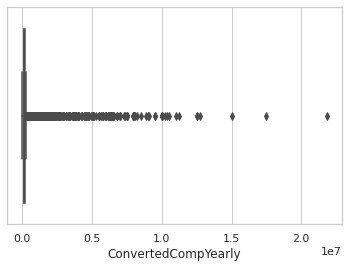

In [8]:
# !conda install --yes --prefix {sys.prefix} seaborn
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df2["ConvertedCompYearly"])

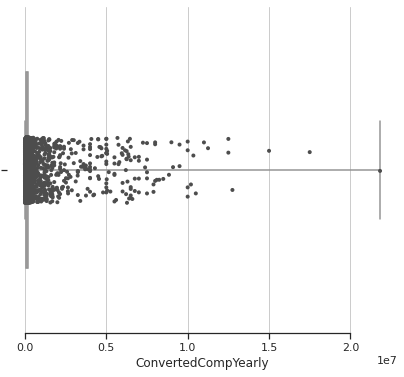

In [9]:
# !conda install --yes --prefix {sys.prefix} matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

# Load the example planets dataset
# planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x=df2["ConvertedCompYearly"], whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=df2["ConvertedCompYearly"], 
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


In [ ]:
df2["ConvertedCompYearly"].describe()

In [ ]:
# def new_column(row):
#     if row["ConvertedCompYearly"] <= q1:
#         return "low"
#     elif row["ConvertedCompYearly"] >= cut_high:
#         return "high"
#     else:
#         return "keep"
    
# df["outlier"] = df.apply(new_column, axis=1)
# df["outlier"].value_counts()


In [10]:
# create bins that i didnt use
df2["salary_bin"] =pd.qcut(df2["ConvertedCompYearly"],10)
df2["salary_bin"].value_counts()

/tmp/ipykernel_17778/4281510907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["salary_bin"] =pd.qcut(df2["ConvertedCompYearly"],10)


(83200.0, 100000.0]       1249
(140000.0, 160000.0]      1068
(110000.0, 125000.0]      1027
(189000.0, 250000.0]      1000
(0.999, 65000.0]           965
(65000.0, 83200.0]         964
(125000.0, 140000.0]       960
(250000.0, 21822250.0]     919
(160000.0, 189000.0]       786
(100000.0, 110000.0]       682
Name: salary_bin, dtype: int64

In [11]:
# create subset of dataframe
df5 = df2.loc[(df2["ConvertedCompYearly"]<=250000) & (df2["ConvertedCompYearly"]>=65000)]
# create and export correlation matrix
corr = df5.corr()
corr.to_csv("corr_nooutliers.csv")

In [12]:
from scipy.stats import pearsonr
import pandas as pd

# p value function

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [ ]:
# calculate and export p values
p_values = calculate_pvalues(df5)
p_values.to_csv("p_values.csv")

In [13]:
# start with all the columns

x_columns = ['C++', 'HTML/CSS', 'JavaScript', 'Objective-C', 'PHP',
       'Swift', 'Python', 'Assembly', 'C', 'R', 'Rust', 'TypeScript',
       'Bash/Shell', 'SQL', 'C#', 'Java', 'Node.js', 'PowerShell', 'Ruby',
       'Perl', 'Matlab', 'Kotlin', 'Julia', 'Haskell', 'Delphi', 'Go', 'Scala',
       'Dart', 'VBA', 'Groovy', 'Clojure', 'APL', 'LISP', 'F#', 'Elixir',
       'Erlang', 'Crystal', 'COBOL', 'PostgreSQL', 'SQLite', 'Elasticsearch',
       'Redis', 'MySQL', 'Microsoft SQL Server', 'Oracle', 'MongoDB',
       'MariaDB', 'DynamoDB', 'Couchbase', 'Firebase', 'Cassandra', 'IBM DB2',
       'Laravel', 'Symfony', 'Angular', 'Flask', 'Vue.js', 'jQuery', 'Express',
       'React.js', 'Angular.js', 'Ruby on Rails', 'Django', 'FastAPI',
       'ASP.NET Core ', 'Spring', 'Svelte', 'ASP.NET', 'Gatsby', 'Drupal',
       'Heroku', 'Microsoft Azure', 'AWS', 'Google Cloud Platform',
       'DigitalOcean', 'Oracle Cloud Infrastructure', 'IBM Cloud or Watson']
y = df5["ConvertedCompYearly"]

# run regression
def get_stats():
    x = df5[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                 
Dep. Variable:     ConvertedCompYearly   R-squared (uncentered):                   0.792
Model:                             OLS   Adj. R-squared (uncentered):              0.790
Method:                  Least Squares   F-statistic:                              382.2
Date:                 Fri, 03 Dec 2021   Prob (F-statistic):                        0.00
Time:                         16:56:24   Log-Likelihood:                         -97646.
No. Observations:                 7825   AIC:                                  1.954e+05
Df Residuals:                     7748   BIC:                                  1.960e+05
Df Model:                           77                                                  
Covariance Type:             nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [15]:
# remove non-significant columns

list = ['Objective-C','Assembly','R','Ruby','Perl','Haskell', 'VBA','LISP', 'F#','Erlang','SQLite', 'Crystal','Elasticsearch','MySQL', 'Oracle', 'MongoDB','MariaDB','Couchbase','Firebase', 'Cassandra', 'IBM DB2',
       'Laravel', 'Symfony','Angular','Vue.js','FastAPI','ASP.NET Core ', 'Spring', 'Svelte', 'ASP.NET', 'Gatsby', 'Drupal',
       'Heroku', 'DigitalOcean', 'Oracle Cloud Infrastructure', 'IBM Cloud or Watson']

for x in list:
    x_columns.remove(x)
    
get_stats()

                                 OLS Regression Results                                 
Dep. Variable:     ConvertedCompYearly   R-squared (uncentered):                   0.790
Model:                             OLS   Adj. R-squared (uncentered):              0.789
Method:                  Least Squares   F-statistic:                              716.2
Date:                 Fri, 03 Dec 2021   Prob (F-statistic):                        0.00
Time:                         17:16:54   Log-Likelihood:                         -97667.
No. Observations:                 7825   AIC:                                  1.954e+05
Df Residuals:                     7784   BIC:                                  1.957e+05
Df Model:                           41                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [16]:
# remove non-significant columns


list2 = ['Matlab', 'APL']

for x in list2:
    x_columns.remove(x)
    
get_stats()

                                 OLS Regression Results                                 
Dep. Variable:     ConvertedCompYearly   R-squared (uncentered):                   0.790
Model:                             OLS   Adj. R-squared (uncentered):              0.789
Method:                  Least Squares   F-statistic:                              752.5
Date:                 Fri, 03 Dec 2021   Prob (F-statistic):                        0.00
Time:                         17:19:15   Log-Likelihood:                         -97670.
No. Observations:                 7825   AIC:                                  1.954e+05
Df Residuals:                     7786   BIC:                                  1.957e+05
Df Model:                           39                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [17]:
print(x_columns)

['C++', 'HTML/CSS', 'JavaScript', 'PHP', 'Swift', 'Python', 'C', 'Rust', 'TypeScript', 'Bash/Shell', 'SQL', 'C#', 'Java', 'Node.js', 'PowerShell', 'Kotlin', 'Julia', 'Delphi', 'Go', 'Scala', 'Dart', 'Groovy', 'Clojure', 'Elixir', 'COBOL', 'PostgreSQL', 'Redis', 'Microsoft SQL Server', 'DynamoDB', 'Flask', 'jQuery', 'Express', 'React.js', 'Angular.js', 'Ruby on Rails', 'Django', 'Microsoft Azure', 'AWS', 'Google Cloud Platform']


In [23]:
# create dataframe with final columns
df6 = df5[['ConvertedCompYearly','C++', 'HTML/CSS', 'JavaScript', 'PHP', 'Swift', 'Python', 'C', 'Rust', 'TypeScript', 'Bash/Shell', 'SQL', 'C#', 'Java', 'Node.js', 'PowerShell', 'Kotlin', 'Julia', 'Delphi', 'Go', 'Scala', 'Dart', 'Groovy', 'Clojure', 'Elixir', 'COBOL', 'PostgreSQL', 'Redis', 'Microsoft SQL Server', 'DynamoDB', 'Flask', 'jQuery', 'Express', 'React.js', 'Angular.js', 'Ruby on Rails', 'Django', 'Microsoft Azure', 'AWS', 'Google Cloud Platform']]
# print revised correlation matrix
df6.corr()
df6.corr().to_csv("smaller_corr_matrix.csv")


In [24]:
# print revised p values
p_values2 = calculate_pvalues(df6)
p_values2.to_csv("revised_p_values.csv")

In [ ]:
# create a column with a count by row of languages used (not used)
cols = ['C++', 'HTML/CSS', 'JavaScript', 'Objective-C', 'PHP',
       'Swift', 'Python', 'Assembly', 'C', 'R', 'Rust', 'TypeScript',
       'Bash/Shell', 'SQL', 'C#', 'Java', 'Node.js', 'PowerShell', 'Ruby',
       'Perl', 'Matlab', 'Kotlin', 'Julia', 'Haskell', 'Delphi', 'Go', 'Scala',
       'Dart', 'VBA', 'Groovy', 'Clojure', 'APL', 'LISP', 'F#', 'Elixir',
       'Erlang', 'Crystal', 'COBOL', 'PostgreSQL', 'SQLite', 'Elasticsearch',
       'Redis', 'MySQL', 'Microsoft SQL Server', 'Oracle', 'MongoDB',
       'MariaDB', 'DynamoDB', 'Couchbase', 'Firebase', 'Cassandra', 'IBM DB2',
       'Laravel', 'Symfony', 'Angular', 'Flask', 'Vue.js', 'jQuery', 'Express',
       'React.js', 'Angular.js', 'Ruby on Rails', 'Django', 'FastAPI',
       'ASP.NET Core ', 'Spring', 'Svelte', 'ASP.NET', 'Gatsby', 'Drupal',
       'Heroku', 'Microsoft Azure', 'AWS', 'Google Cloud Platform',
       'DigitalOcean', 'Oracle Cloud Infrastructure', 'IBM Cloud or Watson']

df3['total_2'] = df3[cols].sum(axis=1)
df3

In [ ]:
# correlation matrix heat map
import seaborn as sns
sns.set(rc = {'figure.figsize':(500, 500)})
sns.heatmap(corr_matrix, annot=True)
plt.show()
